Time taken by loop =  0.376964807510376
Time taken by vectorization =  0.004611015319824219


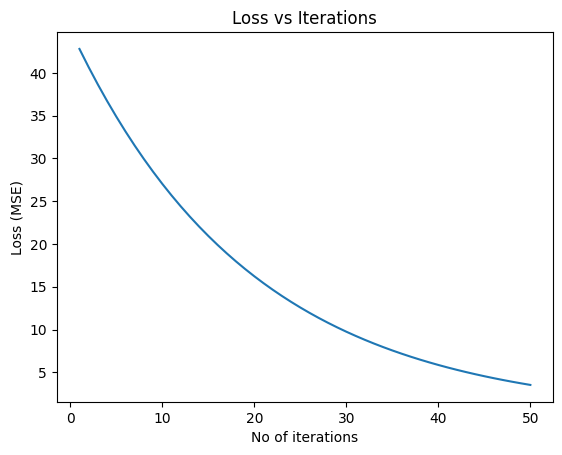

The value of m =  1.981013608291865
The value of c =  3.7042162059209156
The actual values of y are:  [5.9004411  7.683365   7.25430466 ... 7.98930146 6.08786453 5.60629592]
The predicted values of y are:  [4.44618528 5.58759418 5.15430617 ... 5.57965747 4.49164533 4.1343743 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

class LinearRegression:
  def __init__(self, lRate = 0.05, itr = 100):
    self.lRate = lRate
    self.itr = itr

    # Line equation is y = mx + c
    self.m = None
    self.c = None
    self.lossArray = []

  def calculateLoop(self, x, y):
    nElements = len(x)
    self.m = 0.0
    self.c = 0.0

    for _ in range(self.itr):

      dm = 0.0
      dc = 0.0
      loss = 0.0


      for ctr in range(nElements):
        yPredicted = self.m * x[ctr] + self.c
        error = yPredicted - y[ctr]

        dm = dm + error * x[ctr]
        dc = dc + error

      loss = loss / nElements
      self.lossArray.append(loss)

      dm = (2 / nElements) * dm
      dc = (2 / nElements) * dc

      self.m = self.m - dm * self.lRate
      self.c = self.c - dc * self.lRate

  def calculateDot(self, x, y):
    nElements = len(x)
    self.m = 0.0
    self.c = 0.0

    for _ in range(self.itr):
      yPredicted = x.dot(self.m) + self.c
      error = y - yPredicted

      loss = np.mean(error ** 2)
      self.lossArray.append(loss)

      dm = (-2 / nElements) * np.sum(x * error)
      dc = (-2 / nElements) * np.sum(error)

      self.m = self.m - dm * self.lRate
      self.c = self.c - dc * self.lRate

  def predict(self, x):
    return self.m * x + self.c



#x = np.array([1,2,3,4,5,6,7,8,9,10])
#y = np.array([5.1,7.0,9.2,11.1,12.9,15.2,17.1,19.0,21.3,22.8])

np.random.seed(42)
x = np.random.rand(10000)
y = 3 * x + 5 + np.random.randn(10000) * 0.15

start = time.time()
testLoop = LinearRegression(lRate = 0.01, itr = 50)
testLoop.calculateLoop(x, y)
loopTime = time.time() - start

print("Time taken by loop = ", loopTime)

start = time.time()
testDot = LinearRegression(lRate = 0.01, itr = 50)
testDot.calculateDot(x, y)
dotTime = time.time() - start

print("Time taken by vectorization = ", dotTime)

plt.figure()
plt.plot(range(1, testDot.itr + 1), testDot.lossArray)
plt.xlabel("No of iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Iterations")
plt.show()

print("The value of m = ",testDot.m)
print("The value of c = ",testDot.c)

print("The actual values of y are: ",y)

print("The predicted values of y are: ",testDot.predict(x))